<a href="https://colab.research.google.com/github/Carol-Nunes/Calculo-de-metricas/blob/main/Exercicio_Calculo_de_Metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matriz de Confusão

[[3 0]
 [2 4]]


<Axes: title={'center': 'Confusion Matrix'}>

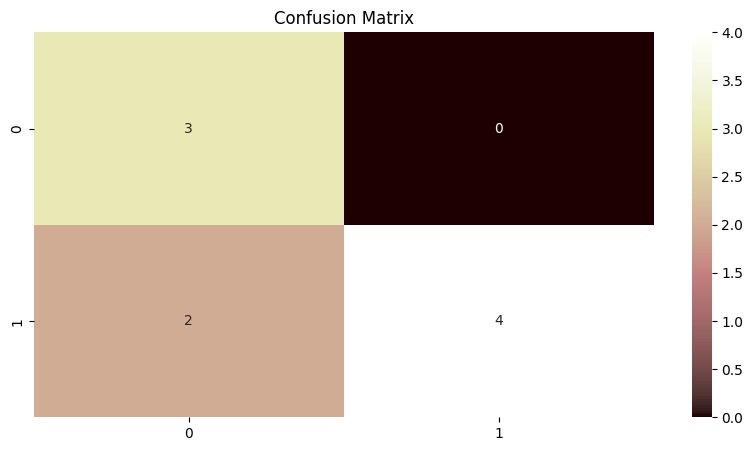

In [ ]:
# Criando a matriz de confusão arbitrária e plotando ela.

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

x_true = [1, 0, 1, 1, 0, 1, 0, 1, 1]
x_pred = [0, 0, 1, 1, 0, 1, 0, 1, 0]

cnf_mtx = confusion_matrix(x_true, x_pred)
print(cnf_mtx)

plt.figure(figsize = (10, 5))
plt.title('Confusion Matrix')
sns.heatmap(cnf_mtx, annot = True, cmap = 'pink')


In [ ]:
# Extração dos valores de True Positive (tp), True Negative (tn), False Positive (fp) e False Negative (fn) a partir da matriz de confusão.

tp = cnf_mtx[0][0]
tn = cnf_mtx[1][1]
fp = cnf_mtx[0][1]
fn = cnf_mtx[1][0]

# Acurácia

In [ ]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f'Acurácia: {accuracy}')



Acurácia: 0.7777777777777778


# Recall

In [ ]:
recall = tp / (tp + fn)
print(f'Recall: {recall}')


Recall: 0.6


# Especificidade

In [ ]:
especificidade = tn / (fp + tn)
print(f'Especificidade: {especificidade}')

Especificidade: 1.0


# Precisão

In [ ]:
precisao = tp / (tp + fp)
print(f'Precisão: {precisao}')

Precisão: 1.0


# F-score

In [ ]:
f_score = (2 * precisao * recall) / (precisao + recall)
print(f'F-score: {f_score}')

F-score: 0.7499999999999999


# Curva ROC

In [ ]:
# Criação da máquina preditiva

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
logreg = LogisticRegression()
logreg.fit([[x] for x in range(len(x_true))], x_true) # Treinando o modelo em um dataset criado nesse momento.
y_pred_logreg = logreg.predict_proba([[x] for x in range(len(x_true))])[:, 1] # Calculando a probabilidade de um conjunto de dados determinado nesse momento.

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit([[x] for x in range(len(x_true))], x_true)
y_pred_knn = knn.predict_proba([[x] for x in range(len(x_true))])[:, 1]

In [ ]:
# Avaliação da máquina

from sklearn.metrics import roc_curve

# Calculando os componentes da curva ROC

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(x_true, y_pred_logreg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(x_true, y_pred_knn)


In [ ]:
# Calcular o AUC (Área sob a Curva)

from sklearn.metrics import roc_auc_score

auc_logreg = roc_auc_score(x_true, y_pred_logreg)
auc_knn = roc_auc_score(x_true, y_pred_knn)



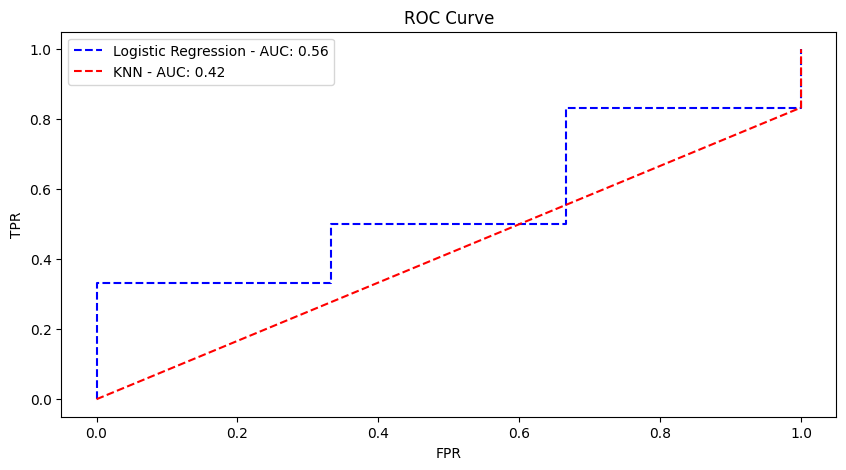

In [ ]:
# Plotando a curva ROC

plt.figure(figsize = (10, 5))
plt.plot(fpr_logreg, tpr_logreg, linestyle = '--', color = 'blue', label = 'Logistic Regression - AUC: %0.2f' % auc_logreg)
plt.plot(fpr_knn, tpr_knn, linestyle = '--', color = 'red', label = 'KNN - AUC: %0.2f' % auc_knn)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()
